In [46]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data


Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
...            ...               ...               ...              ...   
40501      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40503      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40504      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40505      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

      Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0        4F1XA938-1                  1                  OK   
1        3KPM0016-2                  1                  OK   
2        4E1X9167-1                  1                  OK   
3        3K1X0057-1                  1                  OK   
4        3HPM0007-1                  1                  OK   
...             ...                ...                 ...   
40501    3J1XF434-2                  1                  OK   
40502    4E1XC796-1                  1                  OK   
40503    4C1XD438-1                  1                  OK   
40504    3I1XA258-1                  1                  OK   
40505    3G1XA501-1                  1                  OK   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
40501                                   240.0   
40502                                  1000.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION X Unit Time_Dam  CURE END POSITION X Judge Value_Dam  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
40501                                NaN                                  NaN   
40502                                NaN                                  NaN   
40503                                NaN                                  NaN   
40504                                NaN                                  NaN   
40505                                NaN                                  NaN   

       ...  Production Qty Collect Result_Fill2  \
0      ...                                    7   
1      ...                                  185   
2      ...                                   10   
3      ...                                  268   
4      ...                                  121   
...    ...                                  ...   
40501  ...                                  318   
40502  ...                                   14   
40503  ...                                    1   
40504  ...                                  117   
40505  ...                                  320   

       Production Qty Unit Time_Fill2  Production Qty Judge Value_Fill2  \
0                                 NaN                               NaN   
1                                 N

In [3]:
# Load data
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
test_data


Set ID Wip Line_Dam Process Desc._Dam  \
0      0001be084fbc4aaa9d921f39e595961b      IVI-OB6     Dam Dispenser   
1      0005bbd180064abd99e63f9ed3e1ac80      IVI-OB6     Dam Dispenser   
2      000948934c4140d883d670adcb609584      IVI-OB6     Dam Dispenser   
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
4      0018e78ce91343678716e2ea27a51c95      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17357  ffed8923c8a448a98afc641b770be153      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   
17359  fff8e38bdd09470baf95f71e92075dec      IVI-OB6     Dam Dispenser   
17360  fffa83e0a13d4c2db4fd8bf905b517d4      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. Seq No._Dam  \
0      Dam dispenser #2      AJX75334501    3J1XF767-1                  1   
1      Dam dispenser #2      AJX75334501    4B1XD472-2                  1   
2      Dam dispenser #1      AJX75334501    3H1XE355-1                  1   
3      Dam dispenser #2      AJX75334501    3L1XA128-1                  1   
4      Dam dispenser #1      AJX75334501    4A1XA639-1                  1   
...                 ...              ...           ...                ...   
17356  Dam dispenser #2      AJX75334501    3K1XB597-1                  1   
17357  Dam dispenser #2      AJX75334501    4A1XB974-1                  1   
17358  Dam dispenser #1      AJX75334501    3L1XA998-1                  1   
17359  Dam dispenser #1      AJX75334501    3F1XC376-1                  1   
17360  Dam dispenser #1      AJX75334501    3J1XC756-1                  1   

      Insp Judge Code_Dam  CURE END POSITION X Collect Result_Dam  \
0                      OK                                  1000.0   
1                      OK                                  1000.0   
2                      OK                                   240.0   
3                      OK                                  1000.0   
4                      OK                                   240.0   
...                   ...                                     ...   
17356                  OK                                  1000.0   
17357                  OK                                  1000.0   
17358                  OK                                   240.0   
17359                  OK                                   240.0   
17360                  OK                                   240.0   

       CURE END POSITION X Unit Time_Dam  ...  \
0                                    NaN  ...   
1                                    NaN  ...   
2                                    NaN  ...   
3                                    NaN  ...   
4                                    NaN  ...   
...                                  ...  ...   
17356                                NaN  ...   
17357                                NaN  ...   
17358                                NaN  ...   
17359                                NaN  ...   
17360                                NaN  ...   

       Production Qty Collect Result_Fill2  Production Qty Unit Time_Fill2  \
0                                      195                             NaN   
1                                       14                             NaN   
2                                       98                             NaN   
3                                       14                             NaN   
4                                        1                             NaN   
...                                    ...                             ...   
17356                                   14                             NaN   
17357                                   12                             NaN   
17358                                    4                             NaN   
17359                

In [4]:
train_target = train_data['target']
testSet = test_data['Set ID']
test_target = test_data['target']

In [5]:
train_data = train_data.drop(columns = ['target'])
test_data = test_data.drop(columns=['Set ID', 'target'])

In [6]:
df = pd.concat([train_data, test_data], ignore_index=True)

In [7]:
# 각 열별 결측치 개수 확인
missing_values_count = (df.isnull().sum())
missing_values_count = missing_values_count/df.shape[0] 
missing_values_ratio = missing_values_count * 100
print(missing_values_ratio)

Wip Line_Dam                       0.0
Process Desc._Dam                  0.0
Equipment_Dam                      0.0
Model.Suffix_Dam                   0.0
Workorder_Dam                      0.0
                                 ...  
Receip No Unit Time_Fill2        100.0
Receip No Judge Value_Fill2      100.0
WorkMode Collect Result_Fill2      0.0
WorkMode Unit Time_Fill2         100.0
WorkMode Judge Value_Fill2       100.0
Length: 463, dtype: float64


In [8]:
bins = [0, 20, 40, 60, 80, 100]
missing_values_counts = pd.cut(missing_values_ratio, bins=bins).value_counts().sort_index()

print(missing_values_counts)

(0, 20]        0
(20, 40]       3
(40, 60]       0
(60, 80]       5
(80, 100]    278
Name: count, dtype: int64


In [9]:
# 결측치 비율이 30 이상인 열 삭제
threshold = 30
df= df.drop(columns=missing_values_ratio[missing_values_ratio >= threshold].index)


In [10]:
df.shape

(57867, 177)

In [11]:
# "Workorder"를 포함하는 열의 인덱스 찾기
process_columns = [col for col in df.columns if "Workorder" in col]
process_columns

['Workorder_Dam', 'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2']

In [12]:
# 피처 분리 함수 정의
# 피처 분리 함수 정의
def split_workorder_column(df, column_name):
    category_col = f'{column_name}_category'
    number_col = f'{column_name}_number'
    split_cols = df[column_name].str.split('-', expand=True)
    split_cols.columns = [category_col, number_col]
    split_cols[number_col] = split_cols[number_col].astype(int)  # 숫자 컬럼을 int 형식으로 변환
    return split_cols

# 모든 분리된 피처를 저장할 리스트
split_columns = []

# 각 피처에 대해 분리 작업 수행
process_columns = ['Workorder_Dam', 'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2']
for column in process_columns:
    split_columns.append(split_workorder_column(df, column))

# 분리된 모든 피처를 데이터프레임에 결합
df_split = pd.concat([df] + split_columns, axis=1)

print(df_split)

      Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
...            ...               ...               ...              ...   
57862      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
57863      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
57864      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
57865      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
57866      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

      Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0        4F1XA938-1                  

In [13]:
df_split.shape

(57867, 185)

In [14]:
# 1. 상수 열 식별
constant_columns = [col for col in df_split.columns if df_split[col].nunique() == 1]

# 3. 상수 열 삭제
df_split.drop(columns=constant_columns, inplace=True)


In [15]:
df_split.shape

(57867, 150)

In [16]:
# 중복된 열을 식별하고 제거
df_dup = df_split.loc[:, ~df_split.T.duplicated(keep='first')]

df_dup.shape

(57867, 122)

In [17]:
# 숫자형 데이터만 선택
numeric_df = df_dup.select_dtypes(include=[float, int])

# 상관관계 계산
correlation_matrix = numeric_df.corr()

# 상관관계 행렬 출력
print(correlation_matrix)


                                          CURE END POSITION X Collect Result_Dam  \
CURE END POSITION X Collect Result_Dam                                  1.000000   
CURE END POSITION Z Collect Result_Dam                                  1.000000   
CURE END POSITION Θ Collect Result_Dam                                  1.000000   
CURE SPEED Collect Result_Dam                                           0.075891   
CURE START POSITION X Collect Result_Dam                               -1.000000   
...                                                                          ...   
PalletID Collect Result_Fill2                                           0.415403   
Production Qty Collect Result_Fill2                                    -0.166167   
Receip No Collect Result_Fill2                                          0.188893   
WorkMode Collect Result_Fill2                                           0.151136   
Workorder_Dam_number                                                    0.00

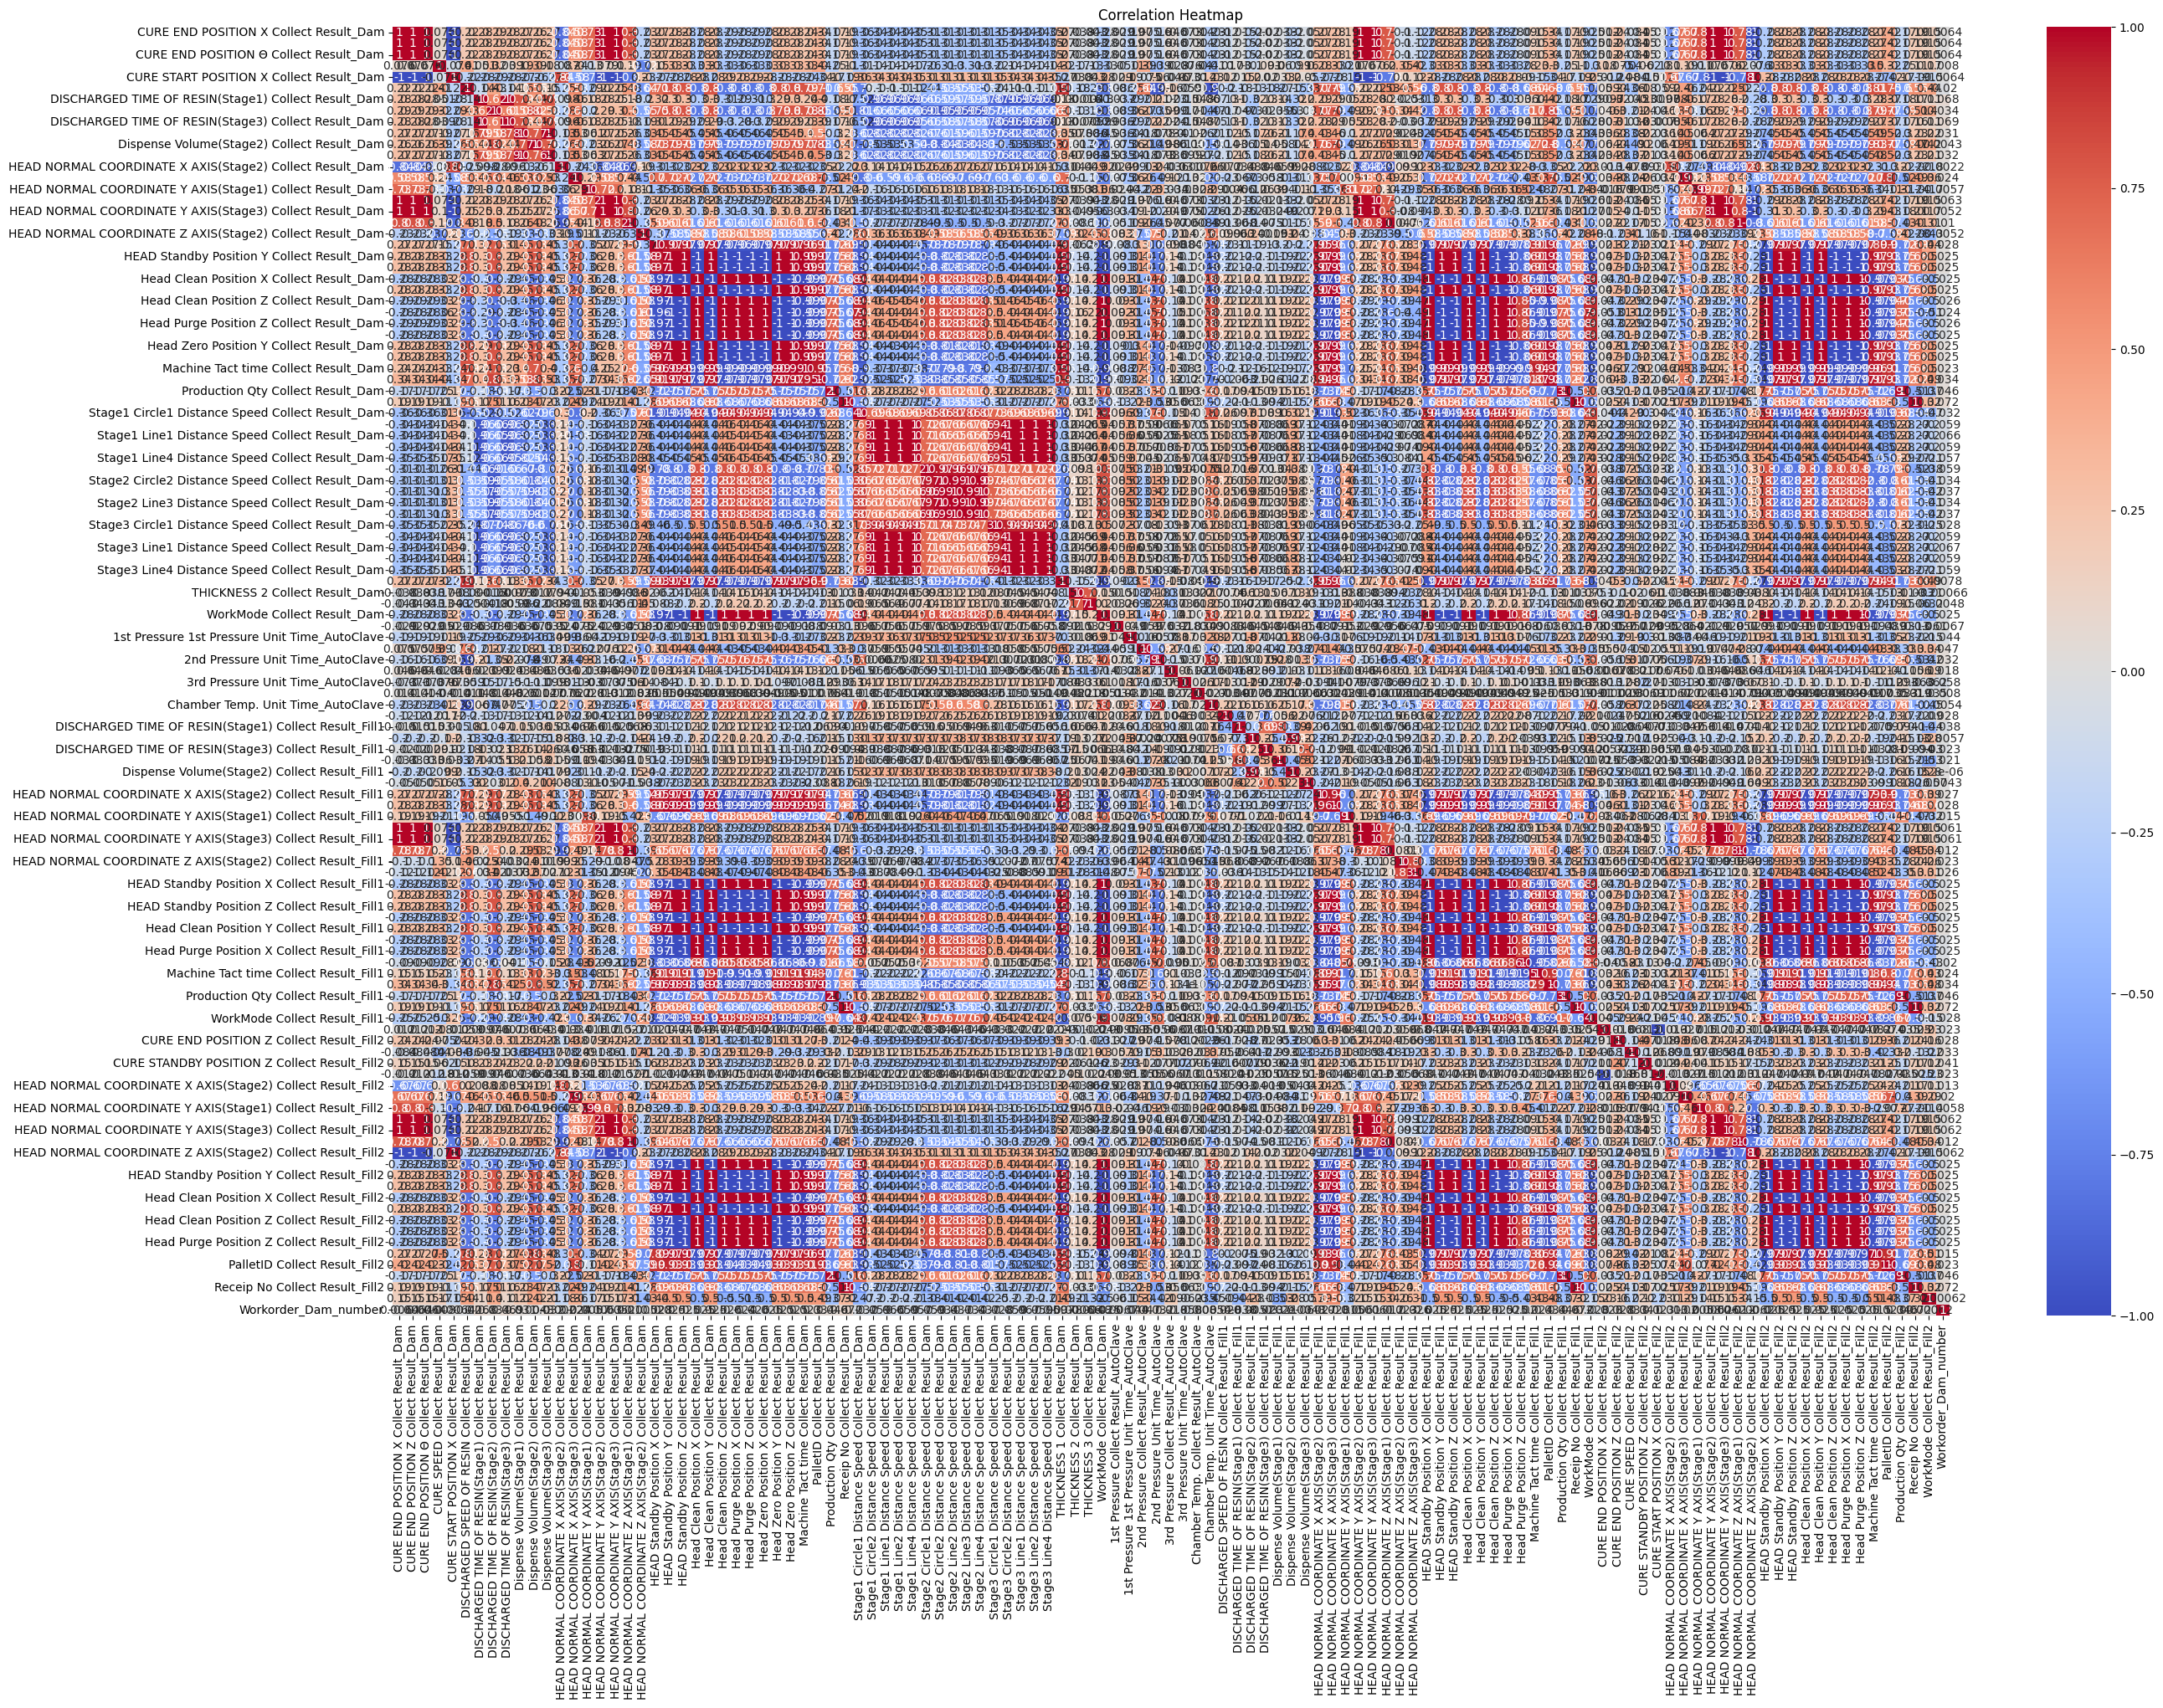

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# 상관관계 행렬의 절대값
corr_matrix = numeric_df.corr().abs()
# 상관관계가 1에 가까운 변수 식별
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 상관관계가 높은 변수 제거
to_drop = [column for column in upper.columns if any(upper[column] >= 1)]
numeric_df_drop = numeric_df.drop(columns=to_drop)

print("제거된 변수:", to_drop)
print(numeric_df_drop)

제거된 변수: ['CURE END POSITION Z Collect Result_Dam', 'CURE START POSITION X Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Fill1', 'Head Clean Position X Collect Result_Fill1', 'Head Clean Position Y Collect Result_Fill1', 'Head Clean Position Z Collect Result_Fill1', 'Head Purge Position X Collect Result_Fill1', 'HEAD Standby Position Y Collect Result_Fill2', 'HEAD Standby Position Z Collect Result_Fill2', 'Head Clean Position X Collect Result_Fill2', 'Head Clean Position Y Collect Result_Fill2', 'Head Clean Position Z Collect Result_Fill2', 'Head Purge Position X Collect Result_Fill2', 'Head Purge Position Z Collect Result_Fill2']
       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...       

In [20]:
numeric_df_drop.shape

(57867, 100)

In [21]:
numeric_df_drop

CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
57862                                  1000.0   
57863                                  1000.0   
57864                                   240.0   
57865                                   240.0   
57866                                   240.0   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         -90                            100   
1                                         -90                             70   
2                                          90                             85   
3                                          90                             70   
4                                         -90                             70   
...                                       ...                            ...   
57862                                      90                             70   
57863                                      90                             70   
57864                                     -90                             70   
57865                                     -90                             70   
57866                                     -90                             70   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                10   
2                                                16   
3                                                10   
4                                                10   
...                                             ...   
57862                                            10   
57863                                            16   
57864                                            16   
57865                                            10   
57866                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   21.3     
2                                                   14.7     
3                                                   21.3     
4                                                    9.7     
...                                                  ...     
57862                                               21.3     
57863                                               13.2     
57864                                               13.2     
57865                                                9.7     
57866                                               17.0     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                    8.4     
1                                                    4.9     
2                                                    8.5     
3                                                    8.4     
4                                                    4.9     
...                                                  ...     
57862                                               10.6     
57863                                                7.6     
57864                                                6.6     
57865                                                3.9     
57866                                                4.9     

       DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                                   14.7     
1                                                   21.3     
2                                                   14.7     
3                                                   21.3  

In [24]:
# 범주형 데이터 열 확인
categorical_df = df_dup.select_dtypes(include=['object', 'category'])
categorical_columns = df_dup.select_dtypes(include=['object', 'category']).columns

# 범주형 데이터 열 개수 출력
num_categorical_columns = len(categorical_columns)
print(f"Number of categorical columns: {num_categorical_columns}")
print(f"Categorical columns: {categorical_columns.tolist()}")

Number of categorical columns: 7
Categorical columns: ['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam', 'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 'Equipment_Fill2', 'Workorder_Dam_category']


In [25]:
# workorder_Dam 열 삭제
categorical_df = categorical_df.drop(columns=['Workorder_Dam'])

In [125]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 새로운 데이터프레임으로 라벨 인코딩 저장
label_encoded_df = categorical_df.copy()  # 원본 데이터프레임 복사

# 범주형 열 라벨 인코딩
for column in label_encoded_df.select_dtypes(include=['object']).columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])



In [27]:
# 두 데이터프레임 결합
combined_df = pd.concat([categorical_df, numeric_df_drop], axis=1)
print(combined_df)

          Equipment_Dam Model.Suffix_Dam Chamber Temp. Judge Value_AutoClave  \
0      Dam dispenser #1      AJX75334505                                  OK   
1      Dam dispenser #1      AJX75334505                                  OK   
2      Dam dispenser #2      AJX75334501                                  OK   
3      Dam dispenser #2      AJX75334501                                  OK   
4      Dam dispenser #1      AJX75334501                                  NG   
...                 ...              ...                                 ...   
57862  Dam dispenser #2      AJX75334501                                  OK   
57863  Dam dispenser #2      AJX75334501                                  OK   
57864  Dam dispenser #1      AJX75334501                                  OK   
57865  Dam dispenser #1      AJX75334501                                  OK   
57866  Dam dispenser #1      AJX75334501                                  OK   

          Equipment_Fill1     Equipment

In [217]:
from sklearn.preprocessing import RobustScaler

# Robust 스케일러 생성
scaler = RobustScaler()

# 정규화 적용
robust_normalized_df = pd.DataFrame(scaler.fit_transform(new_combined_df), columns=new_combined_df.columns)
print(robust_normalized_df)

       Workorder_Dam_number  Chamber Temp. Collect Result_AutoClave  \
0                       0.0                                     0.4   
1                       1.0                                     0.4   
2                       0.0                                     0.8   
3                       0.0                                     0.4   
4                       0.0                                    -1.0   
...                     ...                                     ...   
57862                   0.0                                    -0.4   
57863                   0.0                                     0.2   
57864                   0.0                                     0.4   
57865                   0.0                                     0.4   
57866                   0.0                                     0.4   

       Production Qty Collect Result_Dam  \
0                              -0.053097   
1                               1.522124   
2              

In [28]:
n_train = train_data.shape[0]

In [29]:
# combined_df를 다시 나누기
train = combined_df.iloc[:n_train, :]
test = combined_df.iloc[n_train:, :]

In [30]:
print(train.shape[0], train_data.shape[0])

40506 40506


In [31]:
X = train
y = train_target
X_test = test
y_test = test_target

In [71]:
train.shape

(40506, 106)

In [72]:
test.shape

(17361, 106)

In [36]:
y

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
           ...   
40501      Normal
40502      Normal
40503      Normal
40504      Normal
40505    AbNormal
Name: target, Length: 40506, dtype: object

In [99]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 6.0 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [32]:
from imblearn.under_sampling import RandomUnderSampler

# 다운샘플링 객체 생성
rus = RandomUnderSampler(random_state=42)

# 다운샘플링 적용
X_resampled, y_resampled = rus.fit_resample(X, y)

# 결과 확인
print(f"다운샘플링 후 클래스 비율:\n{pd.Series(y_resampled).value_counts()}")


다운샘플링 후 클래스 비율:
target
AbNormal    2350
Normal      2350
Name: count, dtype: int64


In [73]:
X_resampled.shape

(4700, 106)

In [86]:


# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=21)


In [75]:

X_val.shape

(940, 106)

In [76]:
X_test.shape

(17361, 106)

In [90]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# 범주형 변수 인덱스 찾기
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()  # 범주형 변수 찾기
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_features]  # 인덱스 찾기

# 모델 생성 및 학습
model = CatBoostClassifier(random_state=21, verbose=0)

# fit() 메소드에 cat_features 매개변수 추가
model.fit(X_train, y_train, cat_features=cat_feature_indices)

# 예측
y_pred = model.predict(X_val)

# 성능 평가
print("Classification Report:\n", classification_report(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))


Classification Report:
               precision    recall  f1-score   support

    AbNormal       0.63      0.61      0.62       461
      Normal       0.63      0.66      0.64       479

    accuracy                           0.63       940
   macro avg       0.63      0.63      0.63       940
weighted avg       0.63      0.63      0.63       940

F1 Score: 0.6316879802968873


In [67]:
X_test.shape

(17361, 106)

In [91]:
# 피처 중요도 계산
feature_importances = model.get_feature_importance()
feature_names = X_train.columns  # 피처 이름

In [92]:
feature_importances.shape

(106,)

In [93]:
# 피처 이름과 중요도를 데이터프레임으로 정리
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Importance 컬럼을 기준으로 DataFrame 설정
feature_importances_df.set_index('Feature', inplace=True)

# 중요도가 0.01 이하인 피처 제거
threshold = 0.01
selected_features = feature_importances_df[feature_importances_df['Importance'] > threshold].index

# X_train에서 선택된 피처만 선택
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]
# 결과 확인


In [94]:
print("선택된 피처:\n", selected_features)

선택된 피처:
 Index(['Equipment_Dam', 'Model.Suffix_Dam',
       'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1',
       'Equipment_Fill2', 'Workorder_Dam_category',
       'CURE END POSITION X Collect Result_Dam',
       'CURE END POSITION Θ Collect Result_Dam',
       'CURE SPEED Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       ...
       'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',
       'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2',
       'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
       'HEAD Standby Position X Collect Result_Fill2',
       'Machine Tact time Collect Result_Fill2',
       'PalletID Collect Result_Fill2', 'Production Qty Collect Result_Fill2',
       'Receip No Collect Result_Fill2', 'WorkMode Collect Result_Fill2',
       'Workorder_Dam_number'],
      dtype='object', name='Feature', length=101)


In [95]:
# 범주형 변수 인덱스 찾기
cat_features = X_train_selected.select_dtypes(include=['object', 'category']).columns.tolist()  # 범주형 변수 찾기
cat_feature_indices = [X_train_selected.columns.get_loc(col) for col in cat_features]  # 인덱스 찾기

# 모델 생성 및 학습
model = CatBoostClassifier(random_state=21, verbose=0)

# fit() 메소드에 cat_features 매개변수 추가
model.fit(X_train_selected, y_train, cat_features=cat_feature_indices)

# 예측
y_pred = model.predict(X_val_selected)

# 성능 평가
print("Classification Report:\n", classification_report(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

Classification Report:
               precision    recall  f1-score   support

    AbNormal       0.64      0.62      0.63       461
      Normal       0.65      0.67      0.66       479

    accuracy                           0.64       940
   macro avg       0.64      0.64      0.64       940
weighted avg       0.64      0.64      0.64       940

F1 Score: 0.644374734511665


In [96]:
test_pred = model.predict(X_test_selected)
test_pred

array(['AbNormal', 'AbNormal', 'AbNormal', ..., 'Normal', 'Normal',
       'Normal'], dtype=object)

In [97]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)